### Import

In [1]:
import matplotlib.pyplot as plt
from numpy.random import default_rng
import numpy as np

# Part 1: Generate your own data and visualize it [30 pts]

Create an array of 100 random numbers uniformly distributed between 0 and 1. Create
a second array of 200 random numbers with Gaussian distribution between 1 and 100.

Note: You will need to find an appropriate mean and standard deviation for the
Gaussian. It is okay if just a few of the numbers generated are outside the [1,100]
range.

In [2]:
rng = default_rng(seed=42)
array1 = rng.random(100)

mean, sdv = 50, 30
array2 = rng.normal(mean, sdv, 200)

In [3]:
array2

array([ 61.9932268 ,  22.83562834,  38.65512338,  88.97684893,
        39.31208087,  72.12546705,  21.9914696 ,  43.83687326,
        21.49933835,  39.82900772,  75.20924412,  -1.8196127 ,
        63.03270931,  57.13206807,  32.17550133,   6.61826437,
        52.16388523,  34.11521873,  56.98028634,  50.65556437,
        98.05336674,  42.81933118,  19.29507522,  55.37826905,
        56.59990052,  90.77562726,  75.05333738,  60.70613177,
        93.89908674,  14.33710837,  30.80745402,  22.20272176,
        38.30570591,   8.69941557,  69.0545284 ,  43.33331909,
         5.87581116,  19.53262756,  59.40541542,  75.14379704,
       109.90192675, 137.41587398,  62.432283  ,  20.3138564 ,
       -13.96138842,  58.03134387,  25.61176714,  37.53928219,
        31.63709603,  45.77627341,  81.97940692,  54.71145702,
        45.24095489,  18.93038742,  -0.24048834,  35.41076273,
        48.38652348, 103.03789741,  53.90823564,  79.48218533,
        35.02113204,  14.45168701,  21.04649713,  28.24

## 1 [4 pts] Create a box plot for visualization of both arrays.

{'whiskers': [<matplotlib.lines.Line2D at 0x13950ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x13950e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x139508f8>],
 'medians': [<matplotlib.lines.Line2D at 0x149671a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x14967358>],
 'means': []}

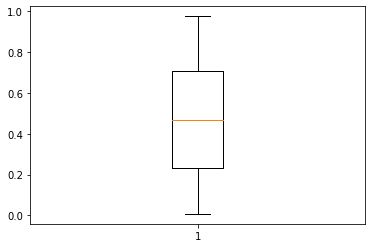

In [4]:
plt.boxplot(array1)

{'whiskers': [<matplotlib.lines.Line2D at 0x149ebb80>,
 'caps': [<matplotlib.lines.Line2D at 0x149ebee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x149eb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x149fb268>],
 'fliers': [<matplotlib.lines.Line2D at 0x149fb418>],
 'means': []}

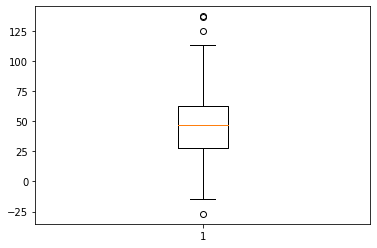

In [5]:
plt.boxplot(array2)

## 2 [4 pts] Create a histogram of both arrays using 20 bins.

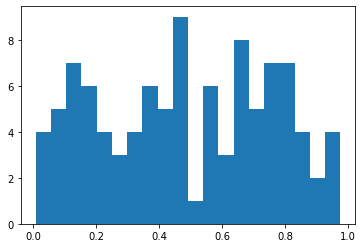

In [9]:
H1, X1, _ = plt.hist(array1, bins=20)

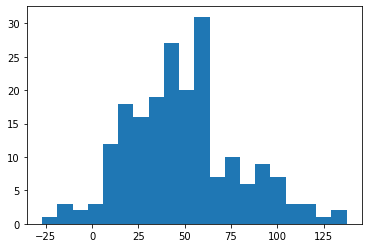

In [10]:
H2, X2, _ = plt.hist(array2, bins=20)

## 3 [6 pts] Write the arrays into a binary file. Read it back into an array. Visualize the arrays that were read in by plotting the cumulative distribution function as a line graph.

In [11]:
import tempfile
fname1 = tempfile.mkstemp()[1]
array1.tofile(fname1)

fname2 = tempfile.mkstemp()[1]
array2.tofile(fname2)

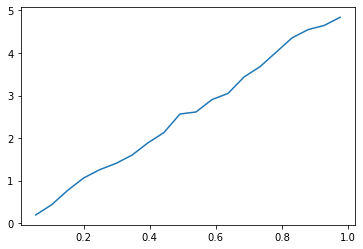

In [14]:
dx1 = X1[1] - X1[0]
F1 = np.cumsum(H1)*dx1

plt.plot(X1[1:], F1)
plt.show()

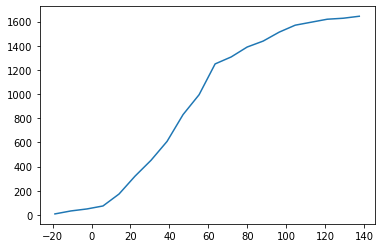

In [15]:
dx2 = X2[1] - X2[0]
F2 = np.cumsum(H2)*dx2

plt.plot(X2[1:], F2)
plt.show()

### 4 4a) [4 pts] Create 2D arrays using random sampling and Latin hypercube sampling with 1,000 points on [0,1] x [0,1]. Plot the arrays with a scatter plot and compare.
Note: You can find python packages for LHS such as in scipy.stats.qmc or pyDOE. In Matlab you can use lhsdesign.


In [18]:
rng = np.random.default_rng()
array1=rng.random((1000, 2))
array1

array([[0.74244691, 0.59427842],
       [0.77095431, 0.92694536],
       [0.62488656, 0.00319908],
       ...,
       [0.92365972, 0.08035825],
       [0.63012571, 0.8734304 ],
       [0.38691055, 0.98381751]])

In [12]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from scipy.stats import qmc
sampler = qmc.LatinHypercube(d=2)
array2 = sampler.random(n=1000)

In [22]:
array2

array([[0.65135123, 0.45191836],
       [0.21053923, 0.18811824],
       [0.90562453, 0.78664661],
       ...,
       [0.62929572, 0.50688281],
       [0.27604299, 0.92729746],
       [0.89691229, 0.21115393]])

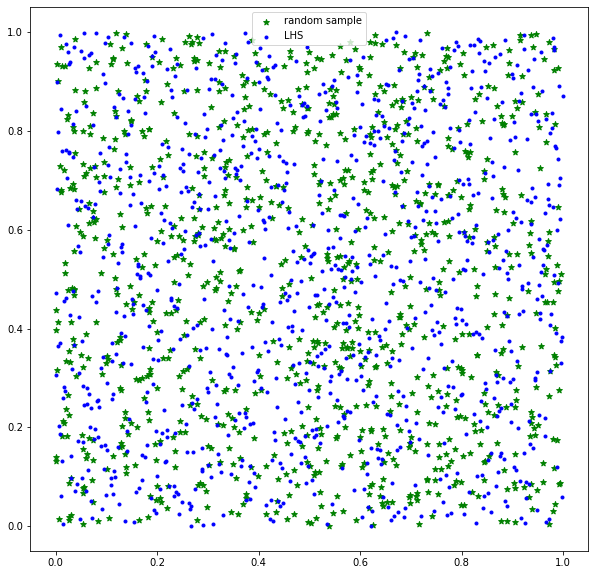

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(array1[:,0], array1[:,1], c='green', marker='*', label='random sample')
plt.scatter(array2[:,0], array2[:,1], c='blue', marker='.', label='LHS')
plt.legend()
plt.show()

The above plot is generated by random sampling and LHS sampling. The green dot represent random sample and the blue dot means LHS. From the plot we can find the blue one seems little bit evenly. 

### 4b) [4 pts] Using the random sampling array, assign a z-value according to the function 𝑧 = sin(10𝑥) ∗ cos (10𝑦). Plot this new data set as a contour plot with 10 levels.
Hint: Use tricontourf in matplotlib as it is unstructured data.

In [40]:
import matplotlib.tri as tri


In [46]:
# random
x1=array1[:,0]
y1=array1[:,1]
z1=np.sin(10*x1)*np.cos(10*y1)
triang1 = tri.Triangulation(x1, y1)

# LHS
x2=array2[:,0]
y2=array2[:,1]
z2=np.sin(10*x2)*np.cos(10*y2)
triang2 = tri.Triangulation(x1, y1)


Text(0.5, 1.0, 'Contour plot of random sampling array')

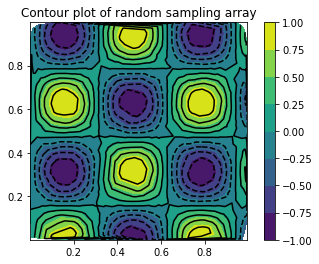

In [51]:
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(triang1, z1)
fig1.colorbar(tcf)
ax1.tricontour(triang1, z1, colors='k', levels=10)
ax1.set_title('Contour plot of random sampling array')

Text(0.5, 1.0, 'Contour plot of LHS array')

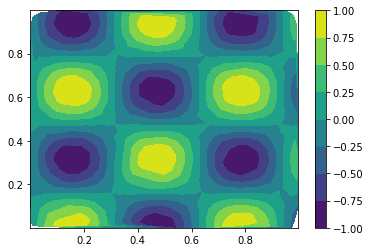

In [53]:
fig2, ax2 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax2.tricontourf(triang2, z1)
fig2.colorbar(tcf)
ax1.tricontour(triang2, z1, colors='k', levels=10)
ax1.set_title('Contour plot of LHS array')

From the above two plots, we can find two plots with different colored block. Based on the colorbar, we know when the color is darker, means the value is lower. So We can find on the first figure, there's lots darker color but on the second one, there are less darker color. That shows on the random sampling, more value towards -1.0. But the LHS, there are less value that's towards -1. 

## 5 [8 pts] Create three random walk data sets in 3D. Take 1,000 steps in each. Plot all three on the same plot using lines and a different color for each.
Note: A random walk is a simple simulation in which at each step you randomly move +1 or -1 in the either the x, y, or z dimension.

In [19]:

steps=1000
step_set = [-1, 0, 1]
origin = np.zeros((1,3))

step_shape = (steps,3)
step_arr = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, step_arr]).cumsum(0)

start = path[:1]
end = path[-1:]


Text(0.5, 0.92, '3D Random Walk')

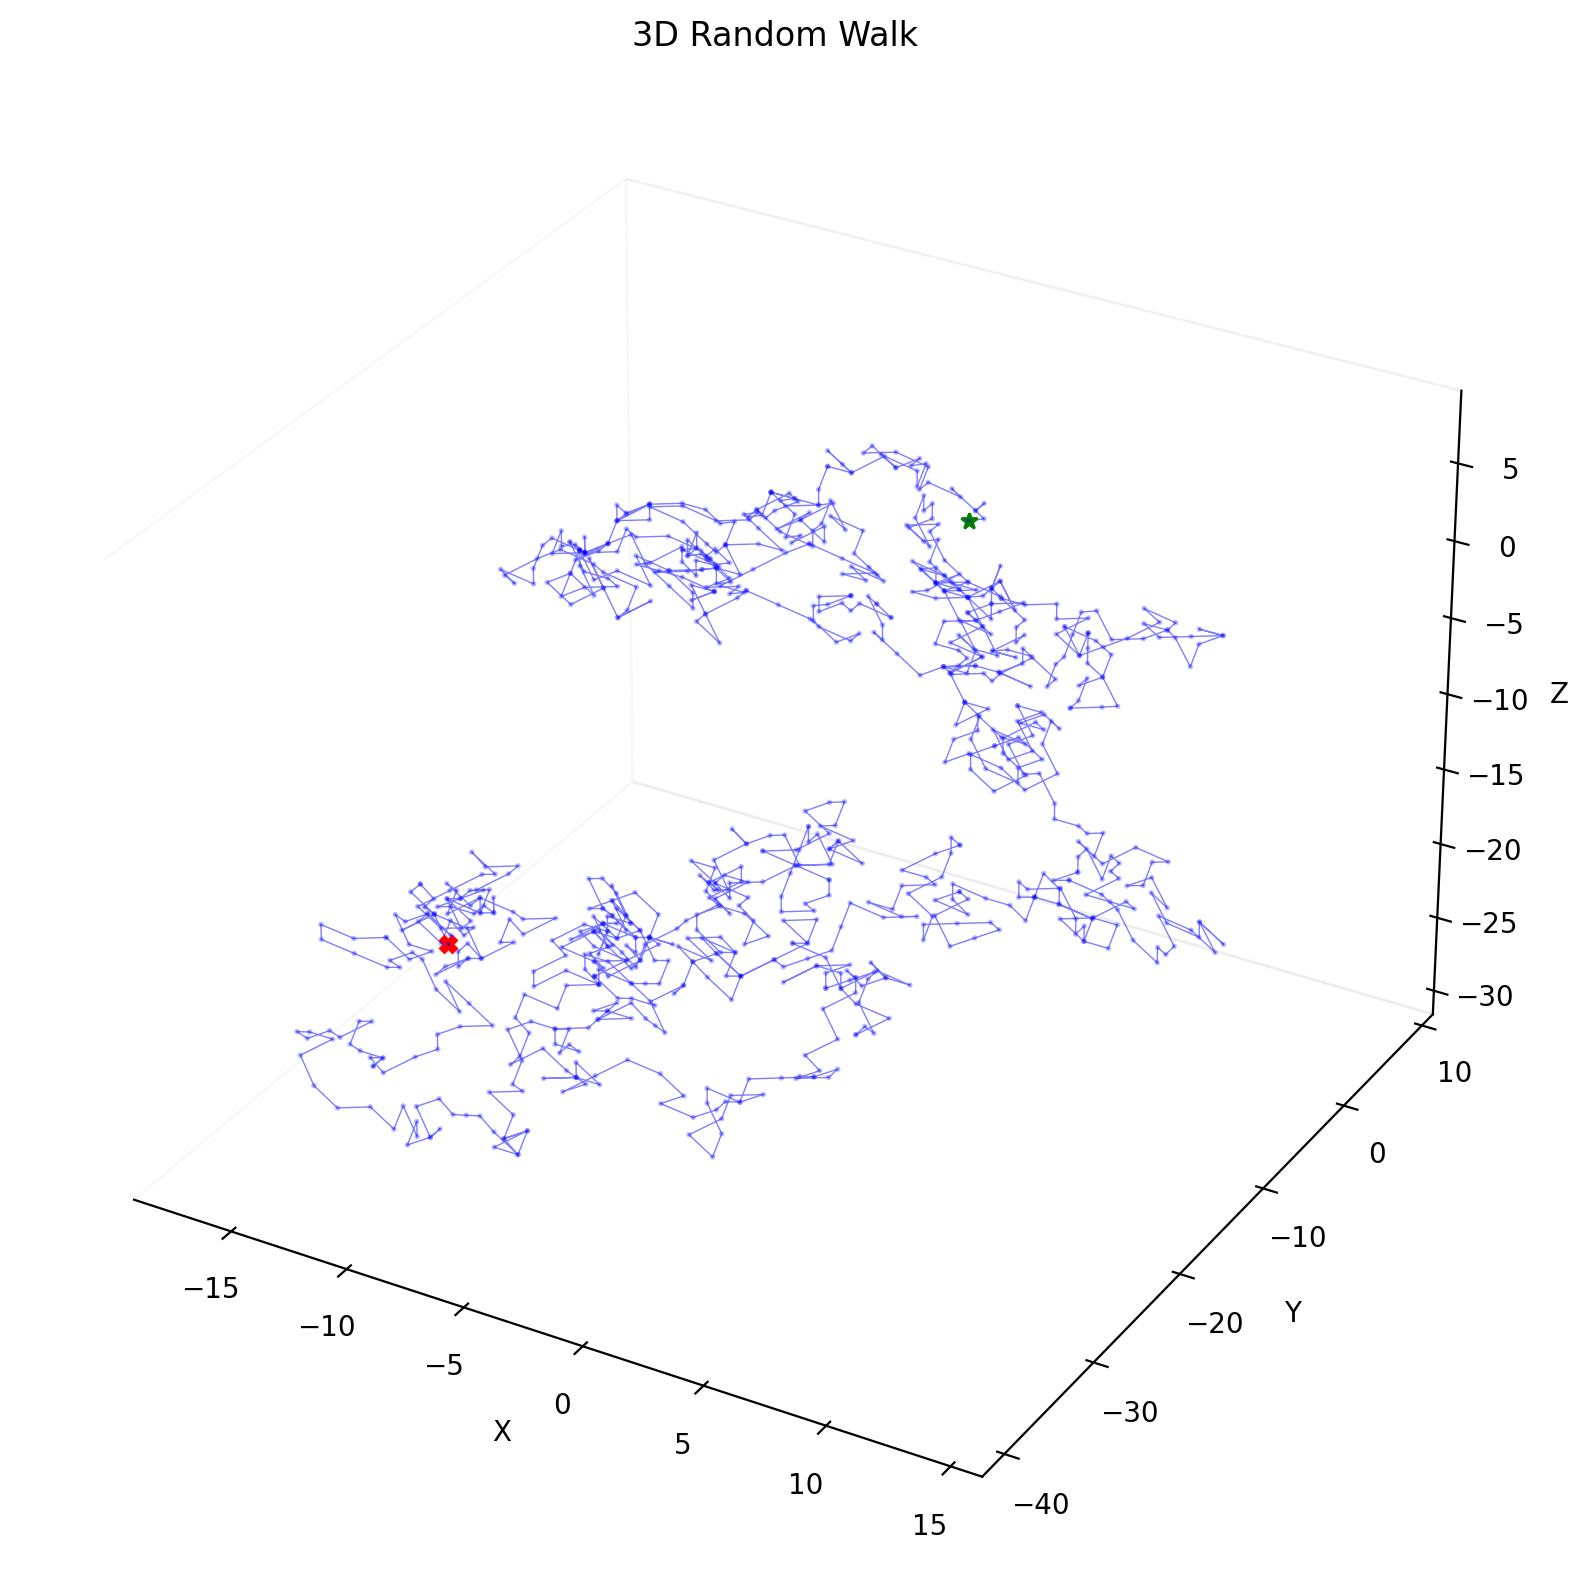

In [28]:
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.5, lw=0.5)

ax.plot3D(start[:,0], start[:,1], start[:,2], c='green', marker='*') # start point
ax.plot3D(end[:,0], end[:,1], end[:,2], c='red', marker='X') # end point

plt.title('3D Random Walk')


# Part 2: Interesting data sets for visualization [30 pts]

## 1 [6 pts] Download the NOAA Land Ocean Temperature Anomalies Data Set:
https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. 
Create a bar plot of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- 
From Average along the y-axis. Describe trends in the data.

In [1]:
import pandas as pd

df = pd.read_csv('NOAA-Temperatures.csv', skiprows=4)

print(df.columns) 

Index(['Year', 'Value'], dtype='object')


Text(0, 0.5, 'Degrees F +/- From Average')

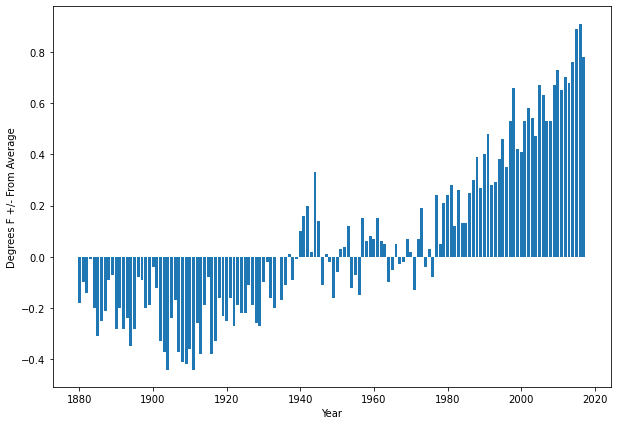

In [6]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['Year'], df['Value'])
plt.xlabel('Year')
plt.ylabel('Degrees F +/- From Average')

From the above bar chart we can see, the trend of average degree is started from negative degree to positive degree. And the degree is increase linearly. 

## 2 [6 pts] Download the U.S. Birth data set: https://git.io/Jt45X. What day of the month had the highest number of births? What day of the month had the lowest number of births? Are there any interesting trends in the data, i.e. more births in Summer or Winter? What about births on Friday the 13th?

In [7]:
df = pd.read_csv('US_births_2000-2014_SSA.csv')

print(df.columns) 

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')


### What day of the month had the highest number of births?

Text(0, 0.5, 'births')

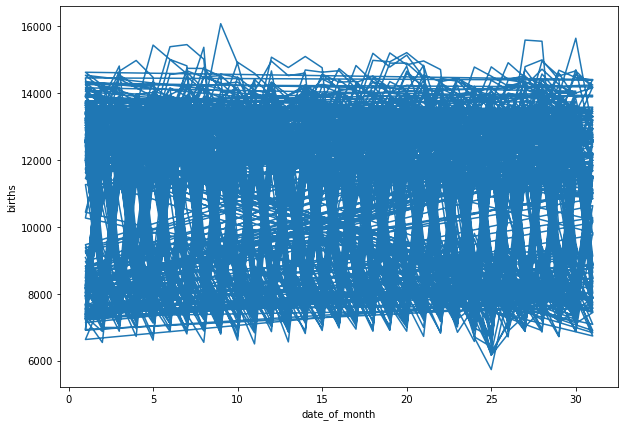

In [24]:
fig = plt.figure(figsize =(10, 7))
plt.plot(df['date_of_month'], df['births'])
plt.xlabel('date_of_month')
plt.ylabel('births')

In [22]:

max_birth=df.loc[df['births']==df['births'].max()]
max_birth

year  month  date_of_month  day_of_week  births
3539  2009      9              9            3   16081

from above we know, when day_of_month==9, it has the max births.

### What day of the month had the lowest number of births?

In [23]:
min_birth=df.loc[df['births']==df['births'].min()]
min_birth

year  month  date_of_month  day_of_week  births
4376  2011     12             25            7    5728

from above answer we know, when day_of_month==25, it had the lowest number of births.

### Are there any interesting trends in the data, i.e. more births in Summer or Winter? 

In [58]:
season_df = df[['month', 'births']].copy()

season_df.loc[(season_df['month']>=2) & (season_df['month']<=4),'season' ] = 'Spring'
season_df.loc[(season_df['month']>=5) & (season_df['month']<=7),'season' ] = 'Summer'
season_df.loc[(season_df['month']>=8) & (season_df['month']<=10),'season' ] = 'Fall'
season_df.loc[(season_df['month']>=11) | (season_df['month']<=1),'season' ] = 'Winter'

# group by season
season_df.set_index('season', inplace=True)
season_sum = season_df.groupby(['season']).sum()
season_sum['births']

season
Fall      16242627
Spring    14859404
Summer    15809223
Winter    15275770
Name: births, dtype: int64

<AxesSubplot:xlabel='season'>

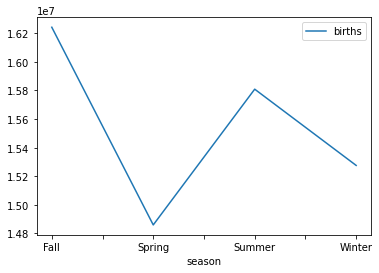

In [57]:
season_sum['births'].plot(legend=True)

From the previous plot we can see, the fall season has the most birth. And the spring season has the lowest birth. 

## 3 [18 pts] Five Thirty Eight maintains a sever with many interesting datasets:
https://github.com/fivethirtyeight/data. 
Choose *three* different data sets to visualize. Visualize each data set using what you think is the most appropriate plot for the given data.Choose between Radar Chart, Parallel Coordinates, and Scatter Plot for each data set and use each plotting type only once. It is also helpful to color lines or points according to certain features in the data set to get more insight. Particularly for the Parallel
Coordinates and Scatter Plot. Describe the trends you can find in the data by experimenting with these plots.

### Radar Chart

HS  High school graduate or less (EDUCD < 65) <br />
SC	Some college (EDUCD >= 65 & <= 100) <br />
BAp	Bachelor's degree or more (EDUCD > 100) <br />
BAo	Bachelor's degree, no graduate degre (EDUCD > 100 & <= 113) <br />
GD	Graduate degree (EDUCD > 113) <br />

In [2]:

import pandas as pd

df = pd.read_csv('thanksgiving-2015-poll-data.csv', index_col=0)
df.columns

Index(['Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served at your Thanksg

In [3]:
pie_df = df[['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)',
]]
pie_df = pie_df.rename(columns={
    'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple': 'Apple',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk': 'Buttermilk',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry': 'Cherry',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate':'Chocolate',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream':'Coconut cream',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime':'Key lime',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach':'Peach',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan':'Pecan',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin':'Pumpkin',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato':'Sweet Potato',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify)': 'Other',
})
pie_df

Apple Buttermilk  Cherry  Chocolate  Coconut cream Key lime  \
RespondentID                                                                
4337954960    Apple        NaN     NaN        NaN            NaN      NaN   
4337951949    Apple        NaN     NaN  Chocolate            NaN      NaN   
4337935621    Apple        NaN  Cherry        NaN            NaN      NaN   
4337933040      NaN        NaN     NaN        NaN            NaN      NaN   
4337931983    Apple        NaN     NaN        NaN            NaN      NaN   
...             ...        ...     ...        ...            ...      ...   
4335944082      NaN        NaN     NaN        NaN            NaN      NaN   
4335943173      NaN        NaN     NaN        NaN            NaN      NaN   
4335943060    Apple        NaN     NaN        NaN            NaN      NaN   
4335934708      NaN        NaN     NaN        NaN  Coconut cream      NaN   
4335894916      NaN        NaN     NaN  Chocolate            NaN      NaN   

              Peach  Pecan  Pumpkin  Sweet Potato                   Other  
RespondentID                                                               
4337954960      NaN    NaN      NaN           NaN                     NaN  
4337951949      NaN    NaN  Pumpkin           NaN  Other (please specify)  
4337935621    Peach  Pecan  Pumpkin  Sweet Potato                     NaN  
4337933040      NaN  Pecan  Pumpkin           NaN                     NaN  
4337931983      NaN    NaN  Pumpkin           NaN                     NaN  
...             ...    ...      ...           ...                     ...  
4335944082      NaN  Pecan  Pumpkin  Sweet Potato                     NaN  
4335943173      NaN    NaN  Pumpkin           NaN                     NaN  
4335943060      NaN    NaN      NaN           NaN                     NaN  
4335934708      NaN    NaN      NaN           NaN                     NaN  
4335894916      NaN    NaN      NaN           NaN                     NaN  

[1058 rows x 11 columns]

In [4]:
pie_count = pie_df.count().to_frame()
pie_count.reset_index(inplace=True) 
pie_count.columns = ['pie type','count']

pie_count

pie type  count
0           Apple    514
1      Buttermilk     35
2          Cherry    113
3       Chocolate    133
4   Coconut cream     36
5        Key lime     39
6           Peach     34
7           Pecan    342
8         Pumpkin    729
9    Sweet Potato    152
10          Other     71

In [5]:
pie_count['count']

0     514
1      35
2     113
3     133
4      36
5      39
6      34
7     342
8     729
9     152
10     71
Name: count, dtype: int64

In [5]:
!  pip install plotly 

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import plotly
import plotly.express as px
fig = px.line_polar(pie_count, r='count', theta='pie type', line_close=True, title='Selection of different pies for Thanksgiving dinner')
fig.show()

From the above radar chart, we found most people choose pumpkin pie during the thanksgiving.And some people choose apple pie. Other type of pies are less people chosen.

###  Parallel Coordinates

In [ ]:
# marriage: https://github.com/fivethirtyeight/data/blob/master/marriage/divorce.csv


HS	High school graduate or less (EDUCD < 65) <br>
SC	Some college (EDUCD >= 65 & <= 100) <br>
BAo	Bachelor's degree, no graduate degre (EDUCD > 100 & <= 113) <br>
GD	Graduate degree (EDUCD > 113)

In [14]:
df = pd.read_csv('divorce.csv', index_col=0)   
divorse_df=df[['year','HS_3544', 'SC_3544','BAo_3544', 'GD_3544']]
divorse_df.columns

Index(['year', 'HS_3544', 'SC_3544', 'BAo_3544', 'GD_3544'], dtype='object')

In [15]:
divorse_df=divorse_df.rename(columns={
    'HS_3544':'high school', 
    'SC_3544':'some college', 
    'BAo_3544': 'Bachelor',
    'GD_3544': 'Graduate'})

<AxesSubplot:>

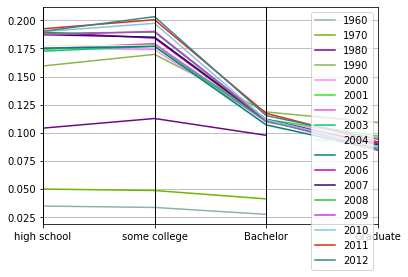

In [16]:
pd.plotting.parallel_coordinates(divorse_df, 'year')

From the above plot, we can find that for most line, they have similar trends, which is stay high when education level is high school or college. And become low when earn bachelor degree or even graduate degree.  

### Scatter Plot 

In [ ]:
# Drug use by age: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age

In [17]:
import pandas as pd

df = pd.read_csv('drug-use-by-age.csv')
print(df.columns) 

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')


In [18]:
use_df=df[['age','alcohol-use', 'marijuana-use',
      'cocaine-use', 'crack-use',
       'heroin-use',  'hallucinogen-use',
        'inhalant-use', 
       'pain-releiver-use', 'oxycontin-use',
       'tranquilizer-use', 
       'stimulant-use',  'meth-use', 
       'sedative-use']]

use_df

age  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0      12          3.9            1.1          0.1        0.0         0.1   
1      13          8.5            3.4          0.1        0.0         0.0   
2      14         18.1            8.7          0.1        0.0         0.1   
3      15         29.2           14.5          0.5        0.1         0.2   
4      16         40.1           22.5          1.0        0.0         0.1   
5      17         49.3           28.0          2.0        0.1         0.1   
6      18         58.7           33.7          3.2        0.4         0.4   
7      19         64.6           33.4          4.1        0.5         0.5   
8      20         69.7           34.0          4.9        0.6         0.9   
9      21         83.2           33.0          4.8        0.5         0.6   
10  22-23         84.2           28.4          4.5        0.5         1.1   
11  24-25         83.1           24.9          4.0        0.5         0.7   
12  26-29         80.7           20.8          3.2        0.4         0.6   
13  30-34         77.5           16.4          2.1        0.5         0.4   
14  35-49         75.0           10.4          1.5        0.5         0.1   
15  50-64         67.2            7.3          0.9        0.4         0.1   
16    65+         49.3            1.2          0.0        0.0         0.0   

    hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
0                0.2           1.6                2.0            0.1   
1                0.6           2.5                2.4            0.1   
2                1.6           2.6                3.9            0.4   
3                2.1           2.5                5.5            0.8   
4                3.4           3.0                6.2            1.1   
5                4.8           2.0                8.5            1.4   
6                7.0           1.8                9.2            1.7   
7                8.6           1.4                9.4            1.5   
8                7.4           1.5               10.0            1.7   
9                6.3           1.4                9.0            1.3   
10               5.2           1.0               10.0            1.7   
11               4.5           0.8                9.0            1.3   
12               3.2           0.6                8.3            1.2   
13               1.8           0.4                5.9            0.9   
14               0.6           0.3                4.2            0.3   
15               0.3           0.2                2.5            0.4   
16               0.1           0.0                0.6            0.0   

    tranquilizer-use  stimulant-use  meth-use  sedative-use  
0                0.2            0.2       0.0           0.2  
1                0.3            0.3       0.1           0.1  
2                0.9            0.8       0.1           0.2  
3                2.0            1.5       0.3           0.4  
4                2.4            1.8       0.3           0.2  
5                3.5            2.8       0.6           0.5  
6                4.9            3.0       0.5           0.4  
7                4.2            3.3       0.4           0.3  
8                5.4            4.0       0.9           0.5  
9                3.9            4.1       0.6           0.3  
10               4.4            3.6       0.6           0.2  
11               4.3            2.6       0.7           0.2  
12               4.2            2.3       0.6           0.4  
13               3.6            1.4       0.4           0.4  
14               1.9            0.6       0.2           0.3  
15               1.4            0.3       0.2           0.2  
16               0.2            0.0       0.0           0.0

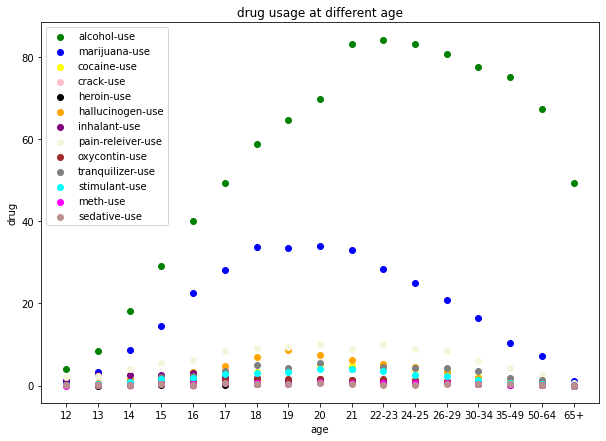

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)



color=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta", "rosybrown"]
for i in range(1, len(use_df.columns)):  
    col=use_df.columns[i]
    y =  use_df[col]
    x =  use_df['age']
    #plt.scatter(x, y)
    plt.scatter(x, y, c=color[i], label=col)

ax.legend()
plt.xlabel('age')
plt.ylabel('drug')
plt.title('drug usage at different age')
plt.show()

From the plot above, we can find the most two drug use is alcohol and marjuana. Also, we can find for all different drugs, the highest age group is between 17 and 23. After 23 years old, the overall trends are decrease. 

# Part 3: Questions on The Value of Visualization Paper [20 pts]

(https://my.eng.utah.edu/~cs6635/Value-of-Visualization.pdf)

## 1 [5 pts] Why is assessing value of visualizations important? What are the two measures for deciding the value of visualizations?

Because accessing value of visualization is vary in different cases. It could refer to different meaning. 
The two measures for deciding the value of visualizations are: effective and efficient. 

## 2 [5 pts] Briefly describe a mathematical model for the visualization block shown in Fig. 1.

The data D is transformed based on the specification S into a time varying image I(t). After that, the amount of knowledge K will be gained depends on image I and perception and cognition P. And the knowledge K can also generate more image I which is a circie between I, P and K. Also, the extracted knowledge K will influence the interactive exploration E. User may use that to implement Specification S for a new round of visualization. 

## 3 [5 pts] State four parameters that describe the costs associated with any visualization technique.

1. on the innovation process of visualization, it's common that only a few new solution survive. The failure rate could be pretty high. 
2. innovation is a long chain and it could take lots time and energy. 
3. it's takes lots of time
4. it needs a large number of users and use cases. 

## 4 [5 pts] What are the pros and cons of interactivity of visualizations?

pros: <br>
1. interaction could make user easily to understand the data. Like they can choose to show small portion of data instead of a large number of data.In this way, it may need setup navigation and selections for user to lead to the interesting poing quickly. <br>

cons: <br>
1. interactive visualization could lead to subjectiveness. And it will be hard to compare different visualizations.
2. It will be costly. Trying all options will spend lots of time.

# Part 4: 3D scalar volume data sets (Only for CS 6635) [20 pts]

MATLAB/Python also can be used for analysis and visualization of 3D volume data sets, such as brain MRI images. Download the brain MRI data set from https://pubweb.eng.utah.edu/~cs6635/T2.nii.gz .
The data format is .nii with 320 x 320 x 256 dimensions.<br>
Load data in MATLAB/Python. Extract one slice for each axis (three slices total) from the volume and save them as images. Use at least two colormaps to show the three image set and describe the difference this choice makes. <br>
• One library that can be used for this in Python is NiBabel: https://nipy.org/nibabel/

In [ ]:
!pip install --user nibabel

In [26]:
import os
from nibabel.testing import data_path
import nibabel as nib

img = nib.load('T2.nii.gz')
img_data = img.get_fdata()

In [14]:
img_data.shape

(320, 320, 256)

Text(0.5, 0.98, 'Slices for brain MRI data')

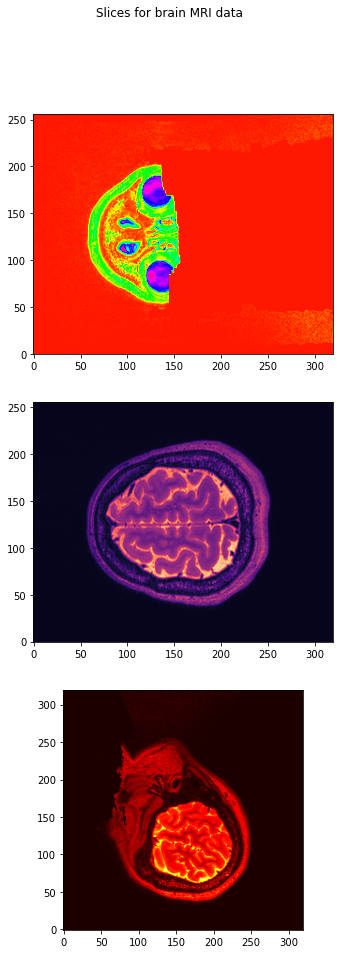

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))


# slice 0
slice_0 = img_data[50, :, :]
axes[0].imshow(slice_0.T, cmap="hsv", origin="lower")

# slice 1
slice_1 = img_data[:, 50, :]
axes[1].imshow(slice_1.T, cmap="magma", origin="lower")

# slice 2
slice_2 = img_data[:, :, 50]
axes[2].imshow(slice_2.T, cmap="hot", origin="lower")


plt.suptitle("Slices for brain MRI data")  

The image above are the three slices I generated from different axis. I choose to use different cmap for different slices.<br>
For the first slice, it use hsv cmap so we can't find the meaning. We only can find the general shape of that slice. <br>
On the second one, I use cmap magma, when the value is higher, the color is lighter. So from the image, we can see which part is lighter and which part is lower. Also we can know what's the slice looks like. <br>
Similar for the third one except I use different colormap hot. The lighter color also means higher value.  
